In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
read_csse = pd.read_pickle('../data_input/data_CSSE.pickletable')
read_pdpc = pd.read_pickle('../data_input/data_cases_factsheet.pickletable')

In [3]:
gisaid_dates = pd.to_datetime([f'2021-11-{d}' for d in read_pdpc.index])
read_pdpc = read_pdpc.set_index(gisaid_dates)

In [4]:
read_csse.index = read_csse.index.shift(periods=-1, freq="D")
# observation: -1 day (earlier) shift gives a similar graph. wonder why the reported numbers are different?

In [5]:
read_merged = pd.concat([read_csse, read_pdpc['daily_cases']], axis=1) #.astype(pd.Int64Dtype())
read_merged.columns = ['csse','factsheet']

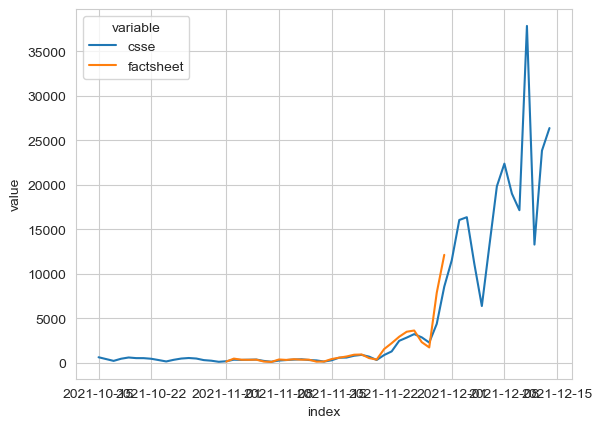

In [7]:
to_plot = read_merged.melt(ignore_index=False).dropna()
sns.lineplot(data=to_plot.reset_index(), x='index', y='value', hue='variable')
plt.savefig('data_compare.jpg', dpi=300)